Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

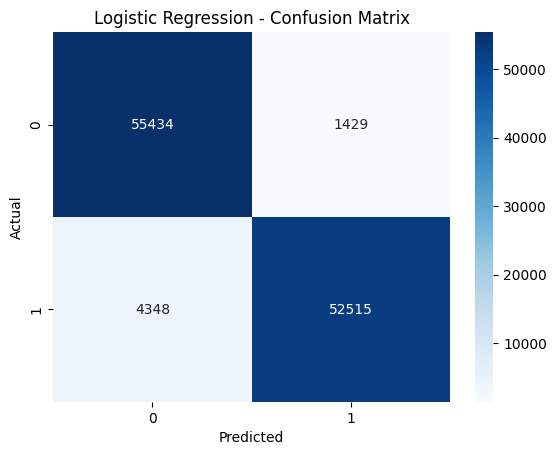


📊 Model: Random Forest
Accuracy: 0.9998768971035648
F1 Score: 0.9998769122560225
ROC-AUC: 0.9998768971035646

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



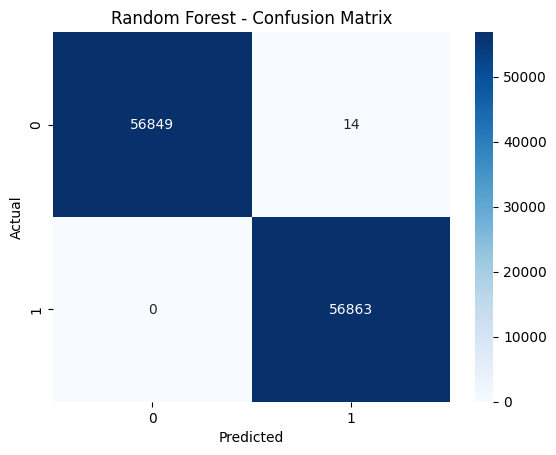


📊 Model: XGBoost
Accuracy: 0.999428450837979
F1 Score: 0.9994287773198232
ROC-AUC: 0.9994284508379789

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



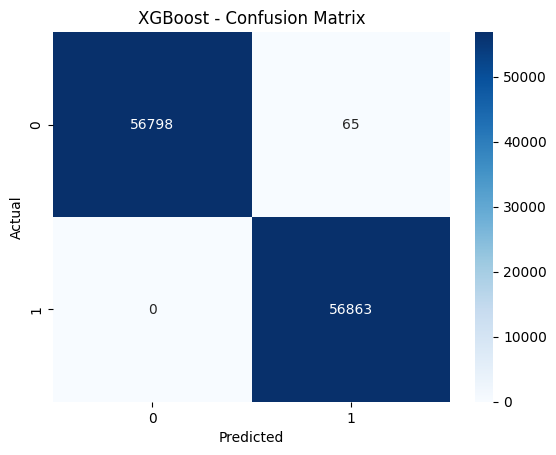


Model Comparison:
                      F1 Score   ROC-AUC
Logistic Regression  0.947864  0.949202
Random Forest        0.999877  0.999877
XGBoost              0.999429  0.999428

✅ Best model saved as best_fraud_model.pkl

Sample Prediction (1=Fraud, 0=Normal): 1


In [ ]:
#1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

#2. Load Dataset
df = pd.read_csv("/content/creditcard.csv")
print("Dataset shape:", df.shape)
print(df.head())

#3. Check Missing Values & Basic Info
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nClass Distribution:\n", df['Class'].value_counts())

#4. Data Preprocessing
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5. Handle Imbalanced Data using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
print("\nAfter SMOTE:")
print(y_resampled.value_counts())

#6. Split Train-Test Data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

#7. Train Models

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#8. Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

#9. Compare Models
models = {
    "Logistic Regression": [f1_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_lr)],
    "Random Forest": [f1_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)],
    "XGBoost": [f1_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)]
}

comparison = pd.DataFrame(models, index=["F1 Score", "ROC-AUC"]).T
print("\nModel Comparison:\n", comparison)

#10. Save Best Model
best_model = xgb  # (You can manually choose based on results)
joblib.dump(best_model, "best_fraud_model.pkl")
print("\n✅ Best model saved as best_fraud_model.pkl")

#11. Predict on new sample
# Example: predict on first row
sample = X_test[0].reshape(1, -1)
prediction = best_model.predict(sample)
print("\nSample Prediction (1=Fraud, 0=Normal):", prediction[0])


Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.7389 - loss: 0.6981 - val_accuracy: 0.9208 - val_loss: 0.4560
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8626 - loss: 0.3288 - val_accuracy: 0.9662 - val_loss: 0.2602
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9200 - loss: 0.2842 - val_accuracy: 0.9740 - val_loss: 0.1812
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.2114 - val_accuracy: 0.9770 - val_loss: 0.1403
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9507 - loss: 0.2180 - val_accuracy: 0.9771 - val_loss: 0.1201
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9543 - loss: 0.1953 - val_accuracy: 0.9770 - val_loss: 0.1093
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9630 - loss: 0.1643 - val_accuracy: 0.9785 - val_loss: 0.0959
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9655 - loss: 0.1312 - val_accuracy: 0.9770 - val_los

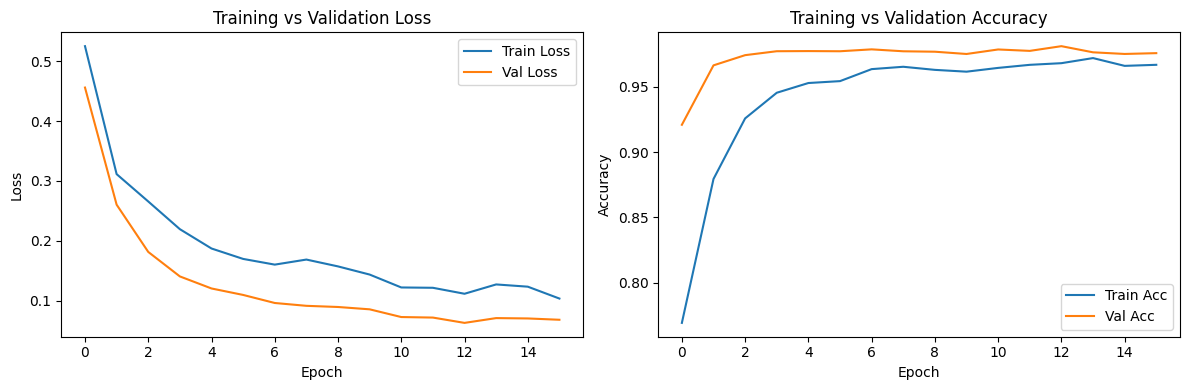

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Deep Learning Model Performance on Test Set
Accuracy: 0.9804431024191567
F1 Score: 0.13777089783281735
ROC-AUC: 0.979339085451288

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



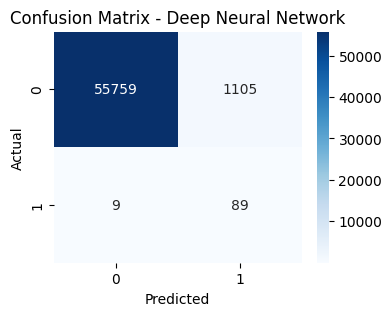


Deep Learning model saved as dl_fraud_model.h5
Scaler saved as scaler.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step

Sample Prediction (probability of fraud): 0.005583742
Sample Prediction (1=Fraud, 0=Normal): 0


In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
    f1_score
)
from sklearn.utils import class_weight

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset
csv_path = "creditcard.csv"
df = pd.read_csv(csv_path)

print("Dataset shape:", df.shape)
print(df.head())
print("\nClass distribution:\n", df["Class"].value_counts())

# 3. Separate Features and Target
X = df.drop("Class", axis=1)
y = df["Class"]

# 4. Train / Test Split (keep class ratio using stratify)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Further split train into train + validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)

print("\nTrain size:", X_train.shape)
print("Val size:", X_val.shape)
print("Test size:", X_test.shape)

# 5. Feature Scaling (very important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 6. Compute Class Weights (to handle imbalance instead of SMOTE)
# This will give more weight to fraud class (1)
class_weights_array = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {
    0: class_weights_array[0],
    1: class_weights_array[1]
}

print("\nClass weights:", class_weights)

# 7. Build Deep Neural Network Model (MLP)
input_dim = X_train_scaled.shape[1]  # number of features (30)

model = Sequential([
    Dense(64, activation="relu", input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation="relu"),
    Dropout(0.2),

    Dense(1, activation="sigmoid")  # output layer for binary classification
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 8. Train Model with Early Stopping
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=2048,   # big batch because dataset is large
    validation_data=(X_val_scaled, y_val),
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

# 9. Plot Training Curves (Loss & Accuracy)
plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# 10. Evaluation on Test Set
y_prob = model.predict(X_test_scaled).ravel()          # probabilities
y_pred = (y_prob > 0.5).astype(int)                    # convert to 0/1

print("\nDeep Learning Model Performance on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))       # use probs for ROC-AUC
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Deep Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Save Model and Scaler
model.save("dl_fraud_model.h5")
import joblib
joblib.dump(scaler, "scaler.pkl")
print("\nDeep Learning model saved as dl_fraud_model.h5")
print("Scaler saved as scaler.pkl")

# 12. Example: Predict on one sample
sample = X_test_scaled[0].reshape(1, -1)
sample_prob = model.predict(sample)[0][0]
sample_pred = int(sample_prob > 0.5)

print("\nSample Prediction (probability of fraud):", sample_prob)
print("Sample Prediction (1=Fraud, 0=Normal):", sample_pred)
